In [2]:
import numpy as np
import pandas as pd

In [3]:
train = pd.read_csv(r"D:\AI_ML_DL\ML\Machine Learning\Case studies\HumanActivityRecognition\HumanActivityRecognition\Data\csv_files\train.csv")

test = pd.read_csv(r"D:\AI_ML_DL\ML\Machine Learning\Case studies\HumanActivityRecognition\HumanActivityRecognition\Data\csv_files\test.csv")

In [4]:
print(train.shape, test.shape)

(7352, 564) (2947, 564)


In [4]:
train.head(2)

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity,ActivityName
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING


In [6]:
x_train =  train.drop(['subject','Activity','ActivityName'],axis=1)
y_train = train.Activity

In [7]:
x_test =  test.drop(['subject','Activity','ActivityName'],axis=1)
y_test = test.Activity

#### Logistic Regression


In [7]:
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [10]:
params = {'C':[0.001,0.01,0.1,1,10,100],'penalty':['l1','l2']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=params,cv=3, verbose=1, n_jobs=-1)

In [15]:
results =dict()
log_reg_grid.fit(x_train,y_train)
y_pred = log_reg_grid.predict(x_test)

acc= metrics.accuracy_score(y_test,y_pred)
cm = metrics.confusion_matrix(y_test,y_pred)
results['accuracy'] = acc
results['confusion_matix']=cm
classification_report =  metrics.classification_report(y_test,y_pred)
results['classification_report']=classification_report
results['model']=log_reg_grid
print(f"\n cm is {cm}")
print(f"\n results are {results}")



Fitting 3 folds for each of 12 candidates, totalling 36 fits


C:\Users\91709\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.8771775         nan 0.91458247        nan 0.93416876
        nan 0.93729756        nan 0.93471225        nan 0.92940874]
  warnings.warn(



 cm is [[492   1   3   0   0   0]
 [ 24 445   2   0   0   0]
 [  4  13 403   0   0   0]
 [  0   3   0 431  57   0]
 [  0   0   0  16 516   0]
 [  0   0   0   0   0 537]]

 results are {'accuracy': 0.9582626399728538, 'confusion_matix': array([[492,   1,   3,   0,   0,   0],
       [ 24, 445,   2,   0,   0,   0],
       [  4,  13, 403,   0,   0,   0],
       [  0,   3,   0, 431,  57,   0],
       [  0,   0,   0,  16, 516,   0],
       [  0,   0,   0,   0,   0, 537]], dtype=int64), 'classification_report': '              precision    recall  f1-score   support\n\n           1       0.95      0.99      0.97       496\n           2       0.96      0.94      0.95       471\n           3       0.99      0.96      0.97       420\n           4       0.96      0.88      0.92       491\n           5       0.90      0.97      0.93       532\n           6       1.00      1.00      1.00       537\n\n    accuracy                           0.96      2947\n   macro avg       0.96      0.96      0.96 

C:\Users\91709\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
print(f"\n results are \n {classification_report}")


 results are 
               precision    recall  f1-score   support

           1       0.95      0.99      0.97       496
           2       0.96      0.94      0.95       471
           3       0.99      0.96      0.97       420
           4       0.96      0.88      0.92       491
           5       0.90      0.97      0.93       532
           6       1.00      1.00      1.00       537

    accuracy                           0.96      2947
   macro avg       0.96      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947



In [46]:
print(f"accuracy is {results['accuracy']}")

accuracy is 0.9582626399728538


In [42]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(7,7))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

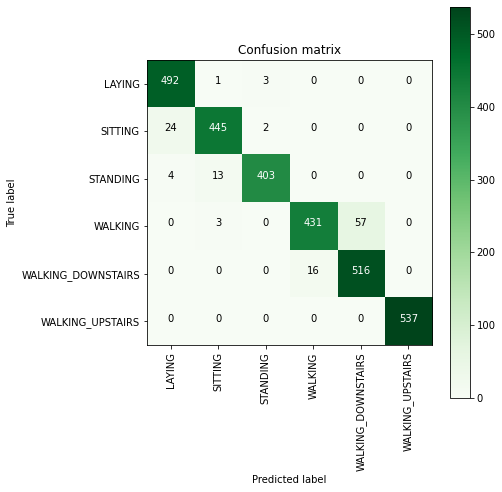

In [43]:
labels=['LAYING', 'SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']
plot_confusion_matrix(cm,labels)

Linear SVC

In [51]:
from sklearn.svm import LinearSVC

params = {'C':[0.125,0.5,1,2,8,16]}
linear_svc = LinearSVC(tol=0.0005)
lin_svc_grid = GridSearchCV(linear_svc,params,n_jobs=-1,verbose=1)

In [52]:
lin_svc_grid.fit(x_train,y_train)
y_pred = lin_svc_grid.predict(x_test)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


C:\Users\91709\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [53]:
accuracy = metrics.accuracy_score(y_test,y_pred)
accuracy

0.9674244994910078

In [59]:
a=metrics.classification_report(y_test,y_pred)
print(a)

              precision    recall  f1-score   support

           1       0.96      1.00      0.98       496
           2       0.98      0.96      0.97       471
           3       1.00      0.98      0.99       420
           4       0.97      0.88      0.93       491
           5       0.91      0.98      0.94       532
           6       1.00      1.00      1.00       537

    accuracy                           0.97      2947
   macro avg       0.97      0.97      0.97      2947
weighted avg       0.97      0.97      0.97      2947



In [62]:
cm=metrics.confusion_matrix(y_test,y_pred)
cm

array([[496,   0,   0,   0,   0,   0],
       [ 17, 454,   0,   0,   0,   0],
       [  3,   5, 412,   0,   0,   0],
       [  0,   3,   0, 433,  53,   2],
       [  1,   0,   0,  12, 519,   0],
       [  0,   0,   0,   0,   0, 537]], dtype=int64)

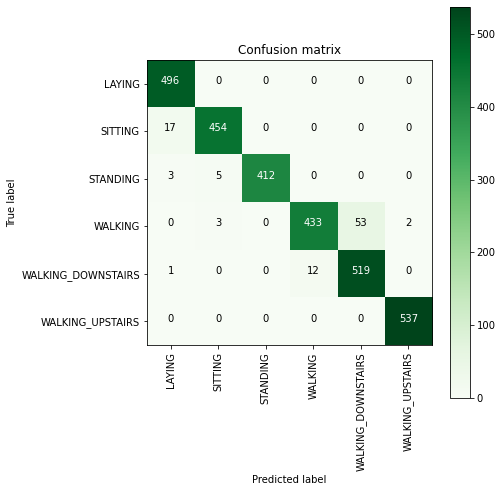

In [64]:
plot_confusion_matrix(cm,labels)

## Kernel SVM with Grid Search

In [65]:
from sklearn.svm import SVC
params = {'C':[2,4,8,16],'gamma':[0.0025,0.6,1,2]}
rbf_kernel = SVC(kernel='rbf')
rbf_kernel_grid = GridSearchCV(rbf_kernel,params,n_jobs=-1, verbose=1)


In [66]:
rbf_kernel_grid.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [2, 4, 8, 16], 'gamma': [0.0025, 0.6, 1, 2]},
             verbose=1)

In [69]:
y_pred = rbf_kernel_grid.predict(x_test)
metrics.accuracy_score(y_test,y_pred)

0.9555480149304377

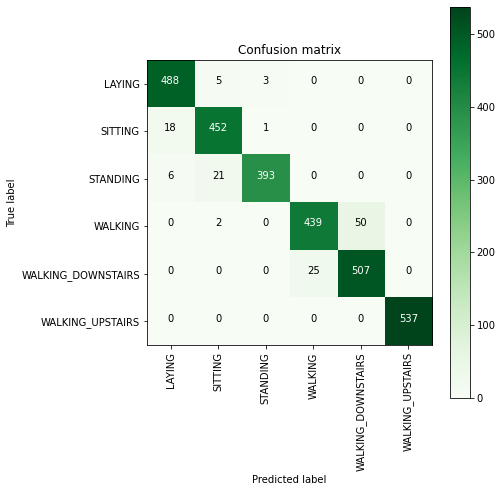

In [70]:
cm=metrics.confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm,labels)

In [72]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.95      0.98      0.97       496
           2       0.94      0.96      0.95       471
           3       0.99      0.94      0.96       420
           4       0.95      0.89      0.92       491
           5       0.91      0.95      0.93       532
           6       1.00      1.00      1.00       537

    accuracy                           0.96      2947
   macro avg       0.96      0.95      0.96      2947
weighted avg       0.96      0.96      0.96      2947



In [73]:
rbf_kernel_grid.best_params_

{'C': 8, 'gamma': 0.0025}

## Decision Trees with Grid Search

Fitting 5 folds for each of 4 candidates, totalling 20 fits
accuracy for  DT classifier is  0.8615541228367831
classification report for  DT classifier is 
               precision    recall  f1-score   support

           1       0.95      0.83      0.89       563
           2       0.78      0.84      0.81       438
           3       0.81      0.88      0.84       386
           4       0.78      0.81      0.79       478
           5       0.83      0.81      0.82       545
           6       1.00      1.00      1.00       537

    accuracy                           0.86      2947
   macro avg       0.86      0.86      0.86      2947
weighted avg       0.87      0.86      0.86      2947



{'max_depth': 7}

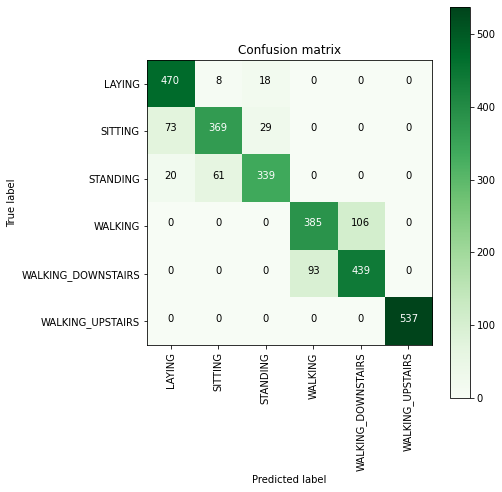

In [76]:
from sklearn.tree import DecisionTreeClassifier
params = {'max_depth':np.arange(3,10,2)}

dt = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt,params,n_jobs=-1,verbose=1)
dt_grid.fit(x_train,y_train)
y_pred = dt_grid.predict(x_test)
print(f"accuracy for  DT classifier is  {metrics.accuracy_score(y_pred,y_test)}")
cm= metrics.confusion_matrix(y_test,y_pred)
print(f"classification report for  DT classifier is \n {metrics.classification_report(y_pred,y_test)}")
plot_confusion_matrix(cm,labels)
dt_grid.best_params_

## Random forest Classifier with Grid Search

In [78]:
from sklearn.ensemble import RandomForestClassifier
params = {'n_estimators':np.arange(10,210,20),'max_depth':np.arange(4,15,3)}
rfc = RandomForestClassifier()
rfc_grid=GridSearchCV(rfc,params,n_jobs=-1, verbose=1)
rfc_grid.fit(x_train,y_train)


Fitting 5 folds for each of 40 candidates, totalling 200 fits


NameError: name 'x_text' is not defined

accuracy for  RFC classifier is  0.9287410926365796
classification report for RFC classifier is 
               precision    recall  f1-score   support

           1       0.96      0.89      0.93       536
           2       0.90      0.89      0.90       475
           3       0.86      0.96      0.91       376
           4       0.89      0.93      0.91       474
           5       0.93      0.91      0.92       549
           6       1.00      1.00      1.00       537

    accuracy                           0.93      2947
   macro avg       0.93      0.93      0.93      2947
weighted avg       0.93      0.93      0.93      2947



{'max_depth': 13, 'n_estimators': 90}

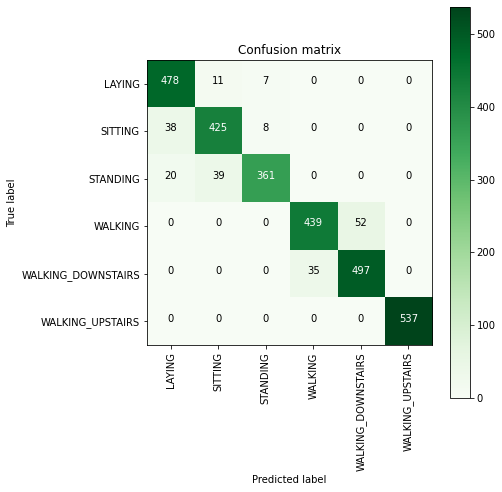

In [79]:
y_pred = rfc_grid.predict(x_test)
print(f"accuracy for  RFC classifier is  {metrics.accuracy_score(y_pred,y_test)}")
cm= metrics.confusion_matrix(y_test,y_pred)
print(f"classification report for RFC classifier is \n {metrics.classification_report(y_pred,y_test)}")
plot_confusion_matrix(cm,labels)
rfc_grid.best_params_

## Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': np.arange(5,8,1), \
             'n_estimators':np.arange(130,170,10)}
gbdt = GradientBoostingClassifier()
gbdt_grid = GridSearchCV(gbdt, param_grid=param_grid, n_jobs=-1)
gbdt_grid.fit(x_train,y_train)
y_pred = gbdt_grid.predict(x_test)

print(f"accuracy for  GBDT classifier is  {metrics.accuracy_score(y_pred,y_test)}")
cm= metrics.confusion_matrix(y_test,y_pred)
print(f"classification report for  GBDT classifier is \n {metrics.classification_report(y_pred,y_test)}")
plot_confusion_matrix(cm,labels)
gbdt_grid.best_params_